FLOWER RECOGNITION

In [1]:
!pip install  opendatasets --upgrade --quiet

In [2]:
import os
import shutil

if os.path.exists('./flowers-recognition'):
  shutil.rmtree('./flowers-recognition')

dataset

In [3]:
import opendatasets as od

In [4]:
dataset_url='https://www.kaggle.com/datasets/alxmamaev/flowers-recognition'

In [5]:
od.download(dataset_url)

100%|██████████| 225M/225M [00:05<00:00, 44.5MB/s]


IMPORT DATASET IN PYTORCH

USE IMAGE FOLDER CLASS FROM TORCH VISION

In [6]:
import os

In [7]:
data_dir='./flowers-recognition/flowers'

In [8]:
os.listdir(data_dir)

['daisy', 'tulip', 'dandelion', 'sunflower', 'rose']

In [9]:
#use this for removing a folder (i made a folder purposefully and deleted it)
import shutil

shutil.rmtree(data_dir+'/.ipynb_checkpoints')

FileNotFoundError: ignored

In [10]:
os.listdir(data_dir)

['daisy', 'tulip', 'dandelion', 'sunflower', 'rose']

In [11]:
os.listdir(data_dir)

['daisy', 'tulip', 'dandelion', 'sunflower', 'rose']

In [12]:
from torchvision.datasets import ImageFolder

In [13]:
for cls in os.listdir(data_dir):
  print(cls,':',len(os.listdir(data_dir+'/'+cls)))

daisy : 764
tulip : 984
dandelion : 1052
sunflower : 733
rose : 784


In [14]:
dataset=ImageFolder(data_dir)

In [15]:
len(dataset)

4317

In [16]:
dataset[0]

(<PIL.Image.Image image mode=RGB size=320x263 at 0x7FDD46464C50>, 0)

In [17]:
dataset.classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

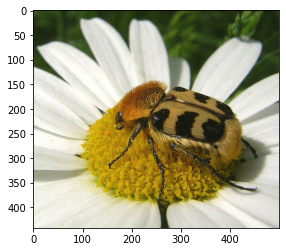

In [19]:
img,label=dataset[120] 
plt.imshow(img)

Now we are making the dat set unoform ,ie resize of image,randomly croppint to a definite size and converting it to tensor 

In [20]:
import torchvision.transforms as tt
dataset=ImageFolder(data_dir,tt.Compose([tt.Resize(64),tt.RandomCrop(64),tt.ToTensor()]))

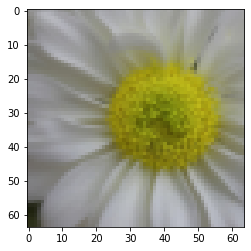

In [21]:
img,label=dataset[0] 
plt.imshow(img.permute(1,2,0))

splitting data

In [22]:
val_pct=0.1
val_size=int(val_pct *len(dataset))#we dont want decimal values
train_size=len(dataset)-val_size

train_size,val_size

(3886, 431)

In [23]:
from torch.utils.data import random_split
train_ds,valid_ds=random_split(dataset,[train_size,val_size])
len(train_ds),len(valid_ds)

(3886, 431)

In [24]:
from torch.utils.data import DataLoader
batch_size=128
train_dl=DataLoader(train_ds,batch_size,shuffle=True,num_workers=4,pin_memory=True)

valid_dl=DataLoader(valid_ds,batch_size,num_workers=4,pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [25]:
from torchvision.utils import make_grid

def show_batch(dl):
  for images,labels in dl:
    fig,ax=plt.subplots(figsize=(12,6))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
    break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


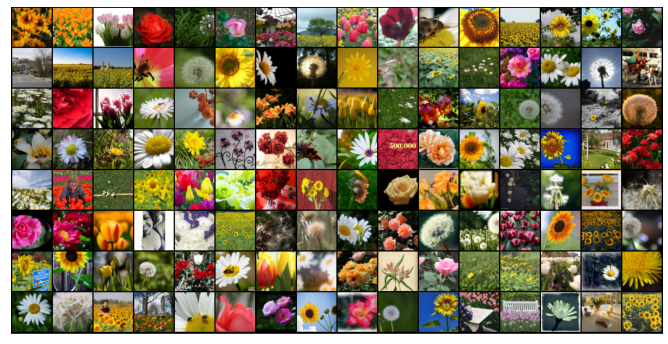

In [26]:
show_batch(train_dl)

GPU UTILITIES

In [27]:
import torch

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [28]:
torch.cuda.is_available()#checks for gpu

True

In [29]:
device=get_default_device()

In [30]:
device


device(type='cuda')

In [31]:
img,label=dataset[0]

In [32]:
img

tensor([[[0.5529, 0.5686, 0.6118,  ..., 0.6510, 0.6235, 0.6039],
         [0.5961, 0.5686, 0.5961,  ..., 0.6353, 0.6157, 0.6039],
         [0.6275, 0.6275, 0.6039,  ..., 0.6196, 0.6157, 0.5961],
         ...,
         [0.5686, 0.5725, 0.5725,  ..., 0.5059, 0.4980, 0.4941],
         [0.5608, 0.5647, 0.5569,  ..., 0.5255, 0.5137, 0.5020],
         [0.5569, 0.5490, 0.4980,  ..., 0.5451, 0.5294, 0.5176]],

        [[0.5569, 0.5725, 0.6157,  ..., 0.6471, 0.6235, 0.6039],
         [0.5961, 0.5686, 0.6000,  ..., 0.6314, 0.6157, 0.6039],
         [0.6235, 0.6235, 0.6039,  ..., 0.6196, 0.6157, 0.5961],
         ...,
         [0.5647, 0.5686, 0.5686,  ..., 0.4902, 0.4824, 0.4824],
         [0.5569, 0.5608, 0.5529,  ..., 0.5098, 0.4980, 0.4863],
         [0.5529, 0.5451, 0.4863,  ..., 0.5294, 0.5137, 0.5020]],

        [[0.5373, 0.5608, 0.6235,  ..., 0.6667, 0.6314, 0.5961],
         [0.6000, 0.5647, 0.6000,  ..., 0.6471, 0.6196, 0.6000],
         [0.6431, 0.6431, 0.6157,  ..., 0.6314, 0.6118, 0.

In [33]:
img.shape

torch.Size([3, 64, 64])

In [34]:
img_gpu=to_device(img,device)
img_gpu.device

device(type='cuda', index=0)

In [35]:
train_dl=DeviceDataLoader(train_dl,device)
valid_dl=DeviceDataLoader(valid_dl,device)

MODEL AND TRAINING UTILITIES

In [36]:
import torch.nn as nn
import torch.nn.functional as F

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        "calculate loss for a batch of training data"
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        "calculate loss & accuracy for a batch of validation data"
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [37]:
def evaluate(model, val_loader):
    """Evaluates the model's performance on the validation set"""
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

MODEL TIME(RESNET)

In [38]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        # Input: 128 x 3 x 64 x 64
        self.conv1 = conv_block(in_channels, 64) # 128 x 64 x 64 x 64
        self.conv2 = conv_block(64, 128, pool=True) # 128 x 128 x 32 x 32
        self.res1 = nn.Sequential(conv_block(128, 128), # 128 x 128 x 32 x 32
                                  conv_block(128, 128)) # 128 x 128 x 32 x 32
        
        self.conv3 = conv_block(128, 256, pool=True) # 128 x 256 x 16 x 16
        self.conv4 = conv_block(256, 512, pool=True) # 128 x 512 x 8 x 8 
        self.res2 = nn.Sequential(conv_block(512, 512), # 128 x 512 x 8 x 8 
                                  conv_block(512, 512)) # 128 x 512 x 8 x 8 
        
        self.classifier = nn.Sequential(nn.AdaptiveMaxPool2d(1), # 128 x 512 x 1 x 1 
                                        nn.Flatten(), # 128 x 512
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [39]:
model=to_device(ResNet9(3,len(dataset.classes)),device)

In [40]:
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [41]:
model.conv1[0].weight

Parameter containing:
tensor([[[[-0.0171, -0.0985,  0.0671],
          [ 0.0581,  0.0867,  0.0787],
          [ 0.0854,  0.0450, -0.0667]],

         [[ 0.1267, -0.1061,  0.1464],
          [-0.1524, -0.0834, -0.0486],
          [ 0.1441, -0.1345, -0.0732]],

         [[-0.1620, -0.1251,  0.1003],
          [-0.0361, -0.0445,  0.1332],
          [ 0.1447,  0.0110,  0.0977]]],


        [[[-0.0287,  0.1213,  0.0206],
          [-0.0971, -0.0579, -0.1537],
          [-0.0487, -0.1610, -0.0658]],

         [[-0.1700,  0.0876,  0.1070],
          [ 0.1913, -0.1431, -0.0649],
          [ 0.0225, -0.0268,  0.1595]],

         [[ 0.0196, -0.0438, -0.0700],
          [-0.1316,  0.0602, -0.0578],
          [ 0.0256,  0.0427, -0.1591]]],


        [[[ 0.0948, -0.1660, -0.1853],
          [-0.1759, -0.0003,  0.0730],
          [ 0.0424, -0.1616,  0.0802]],

         [[-0.0385,  0.0627, -0.1191],
          [ 0.0105, -0.0853, -0.1215],
          [-0.0140,  0.1404, -0.0627]],

         [[-0.0511, -0

In [42]:
model.conv1[0].weight.device

device(type='cuda', index=0)

pass one batch through model to see if its working fine

In [43]:
torch.cuda.empty_cache()
for batch in train_dl:
    images, labels = batch
    print('images.shape', images.shape)
    print('images.device', images.device)
    preds = model(images)
    print('preds.shape', preds.shape)
    break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


images.shape torch.Size([128, 3, 64, 64])
images.device cuda:0
preds.shape torch.Size([128, 5])


TRAINING LETS GO

In [44]:
history=[evaluate(model,valid_dl)]
history

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[{'val_acc': 0.21866688132286072, 'val_loss': 1.613958716392517}]

In [45]:
history+=fit(5,0.001,model,train_dl,valid_dl,torch.optim.Adam)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], train_loss: 1.4933, val_loss: 1.7636, val_acc: 0.3337
Epoch [1], train_loss: 0.9802, val_loss: 0.9772, val_acc: 0.6168
Epoch [2], train_loss: 0.8643, val_loss: 0.9628, val_acc: 0.6280
Epoch [3], train_loss: 0.7655, val_loss: 0.8162, val_acc: 0.6990
Epoch [4], train_loss: 0.6972, val_loss: 0.7841, val_acc: 0.7000


In [46]:
history+=fit(5,0.001,model,train_dl,valid_dl,torch.optim.Adam)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], train_loss: 0.8980, val_loss: 0.8986, val_acc: 0.6702
Epoch [1], train_loss: 0.6644, val_loss: 0.7852, val_acc: 0.7238
Epoch [2], train_loss: 0.6166, val_loss: 0.8664, val_acc: 0.6956
Epoch [3], train_loss: 0.5703, val_loss: 0.7022, val_acc: 0.7478
Epoch [4], train_loss: 0.5101, val_loss: 0.6799, val_acc: 0.7735


In [47]:
history+=fit(5,0.001,model,train_dl,valid_dl,torch.optim.Adam)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], train_loss: 0.5874, val_loss: 0.8285, val_acc: 0.7190
Epoch [1], train_loss: 0.4741, val_loss: 0.6659, val_acc: 0.7643
Epoch [2], train_loss: 0.4280, val_loss: 0.5786, val_acc: 0.8034
Epoch [3], train_loss: 0.3708, val_loss: 0.5514, val_acc: 0.8252
Epoch [4], train_loss: 0.3421, val_loss: 0.6422, val_acc: 0.7629


In [48]:
history+=fit(5,0.0001,model,train_dl,valid_dl,torch.optim.SGD)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], train_loss: 0.3428, val_loss: 0.5795, val_acc: 0.7886
Epoch [1], train_loss: 0.3137, val_loss: 0.5503, val_acc: 0.7978
Epoch [2], train_loss: 0.3086, val_loss: 0.5408, val_acc: 0.8129
Epoch [3], train_loss: 0.3150, val_loss: 0.5341, val_acc: 0.8023
Epoch [4], train_loss: 0.3112, val_loss: 0.5369, val_acc: 0.7998


In [49]:
history+=fit(5,0.0001,model,train_dl,valid_dl,torch.optim.Adam)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], train_loss: 0.2564, val_loss: 0.4287, val_acc: 0.8514
Epoch [1], train_loss: 0.2115, val_loss: 0.4240, val_acc: 0.8676
Epoch [2], train_loss: 0.1909, val_loss: 0.4565, val_acc: 0.8531
Epoch [3], train_loss: 0.1848, val_loss: 0.4196, val_acc: 0.8564
Epoch [4], train_loss: 0.1734, val_loss: 0.4728, val_acc: 0.8447


PLOT ACCURACIES

In [50]:
def plot_accuracies(history):
  accuracies=[x['val_acc'] for x in history]
  plt.plot(accuracies,'-x')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.title("no of epoch vs accuracy")


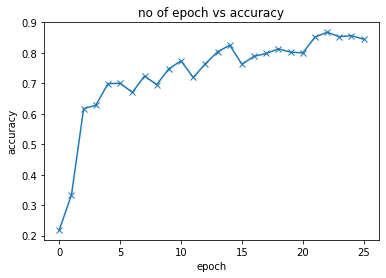

In [51]:
plot_accuracies(history)

In [52]:
def plot_losses(history):

  train_losses = [x.get('train_loss') for x in history]
  val_losses=[x['val_loss'] for x in history]
  plt.plot(train_losses,'-rx')
  plt.plot(val_losses,'-bx')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['Training','Validation'])
  plt.title("no of epoch vs loss")


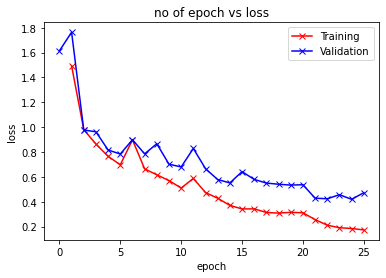

In [53]:
plot_losses(history)

RECORD THE RESULST

In [54]:
history[-5]

{'train_loss': 0.2563953697681427,
 'val_acc': 0.8514378070831299,
 'val_loss': 0.4287150204181671}

TEST WITH INDIVISUAL IMAGES


In [55]:
def predict_image(img, model, classes):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return classes[preds[0].item()]

Target: dandelion
prediction: dandelion


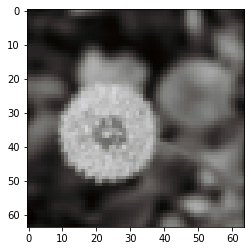

In [56]:
img, label=valid_ds[42]
plt.imshow(img.permute((1,2,0)))
pred=predict_image(img,model,dataset.classes)
print('Target:',dataset.classes[label])
print('prediction:',pred)

In [57]:
def show_image_prediction(img, label):
    plt.imshow(img.permute((1, 2, 0)))
    pred = predict_image(img, model, dataset.classes)
    print('Target:', dataset.classes[label])
    print('Prediction:', pred)

Target: dandelion
Prediction: dandelion


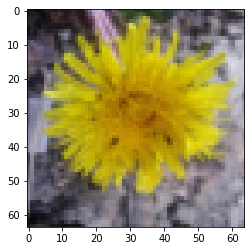

In [58]:
show_image_prediction(*valid_ds[100])

Target: rose
Prediction: rose


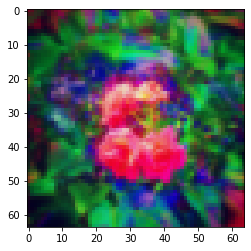

In [59]:
show_image_prediction(*valid_ds[10])

In [60]:
torch.save(model.state_dict(), 'flowers-resnet9.pth')

Transfer learning

In [73]:
from torchvision import models

class ResNet34(ImageClassificationBase):
  def __init__(self,num_classes,pretrained=True):#pretrained on imagenet dataset
    super().__init__()
    #use a pretrained model
    self.network=models.resnet34(pretrained=pretrained)
    #replace last layer
    self.network.fc=nn.Linear(self.network.fc.in_features,num_classes)

  def forward(self,xb):
    return self.network(xb)

In [74]:
model=to_device(ResNet34(len(dataset.classes),pretrained =True),device)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [75]:
model

ResNet34(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_ru

In [76]:
#normalise the image dataset as per imagenet stats

import torchvision.transforms as tt
img_size=224
imagenet_stats=([0.485,.456,.406],[0.229,.224,.225])


In [77]:
import torchvision.transforms as tt
dataset=ImageFolder(data_dir,tt.Compose([tt.Resize(img_size),tt.RandomCrop(img_size),tt.ToTensor(),tt.Normalize(*imagenet_stats)]))

In [78]:
from torch.utils.data import random_split
from torch.utils.data import DataLoader

train_ds,valid_ds=random_split(dataset,[train_size,val_size])
len(train_ds),len(valid_ds)

batch_size=64
train_dl=DataLoader(train_ds,batch_size,shuffle=True,num_workers=4,pin_memory=True)

valid_dl=DataLoader(valid_ds,batch_size,num_workers=4,pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [79]:
train_dl=DeviceDataLoader(train_dl,device)
valid_dl=DeviceDataLoader(valid_dl,device)


In [82]:
import torch
from tqdm.notebook import tqdm
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
#learning rate varies , increasing by factor of 10 for 30% of iteration then increasing
def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader,
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []

    # Set up custom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs,
                                                steps_per_epoch=len(train_loader))

    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        lrs = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()

            # Gradient clipping
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()

        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [87]:

history=[evaluate(model,valid_dl)]


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [88]:
history

[{'val_acc': 0.2606857717037201, 'val_loss': 1.6192145347595215}]

In [92]:
model=to_device(ResNet34(len(dataset.classes),pretrained =True),device)

In [93]:
history+=fit_one_cycle(6,0.001,model,train_dl,valid_dl,weight_decay=0.1,grad_clip=0.1,opt_func=torch.optim.SGD)

  0%|          | 0/61 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], train_loss: 1.4155, val_loss: 0.7433, val_acc: 0.7945


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [1], train_loss: 0.5091, val_loss: 0.3765, val_acc: 0.8953


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [2], train_loss: 0.3341, val_loss: 0.3085, val_acc: 0.9028


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [3], train_loss: 0.2606, val_loss: 0.2491, val_acc: 0.9290


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [4], train_loss: 0.2270, val_loss: 0.2335, val_acc: 0.9357


  0%|          | 0/61 [00:00<?, ?it/s]

Epoch [5], train_loss: 0.2060, val_loss: 0.2343, val_acc: 0.9312


In [94]:
def denormalize(images, means, stds):
    if len(images.shape) == 3:
        images = images.unsqueeze(0)
    means = torch.tensor(means).reshape(1, 3, 1, 1)
    stds = torch.tensor(stds).reshape(1, 3, 1, 1)
    return images * stds + means

def show_image(img_tensor, label):
    print('Label:', dataset.classes[label], '(' + str(label) + ')')
    img_tensor = denormalize(img_tensor, *imagenet_stats)[0].permute((1, 2, 0))
    plt.imshow(img_tensor)

In [95]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [96]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

In [101]:
import numpy as np
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

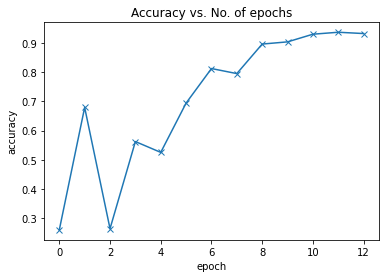

In [98]:
plot_accuracies(history)

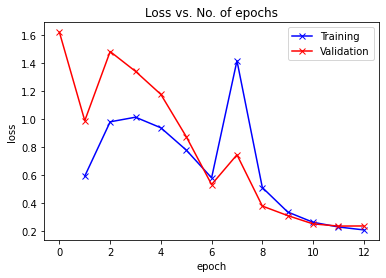

In [99]:
plot_losses(history)

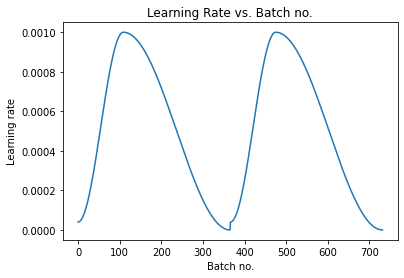

In [102]:
plot_lrs(history)

Label: tulip (4)
predicted: tulip


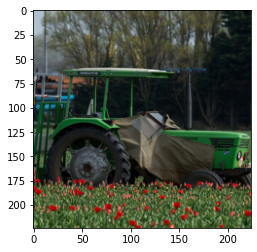

In [104]:
img,label=valid_ds[0]
show_image(img,label)
pred=predict_image(img,model,dataset.classes)
print('predicted:',pred)

Label: tulip (4)
predicted: tulip


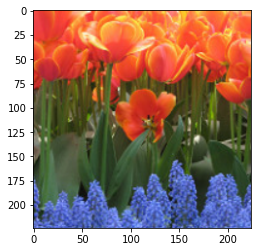

In [105]:
img,label=valid_ds[10]
show_image(img,label)
pred=predict_image(img,model,dataset.classes)
print('predicted:',pred)

Label: tulip (4)
predicted: tulip


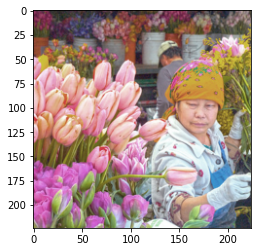

In [106]:
img,label=valid_ds[100]
show_image(img,label)
pred=predict_image(img,model,dataset.classes)
print('predicted:',pred)

Label: tulip (4)
predicted: tulip


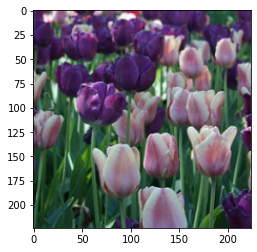

In [107]:
img,label=valid_ds[25]
show_image(img,label)
pred=predict_image(img,model,dataset.classes)
print('predicted:',pred)